## Проект: Исследование данных об играх и игровых платформах 

**Цель исследования:** Найти закономерности определяющие успешность игры.

**Этапы исследования:** 
                         
  1. Обзор данных.
  

  2. Предобработка данных.
  
  
  3. Проведение исследовательского анализа данных:
                           
            Определить количество выпускаемых игр по годам;
            анализ продаж по игровым платформам и по годам;
            определение лидирующей платформы по продажам игр;
            постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
            анализ влияния отзывов пользователей и критиков на продажи;
            анализ игр по жанр 
    
  4. Составление портрета пользователя по регионам:
  
  
  5. Проверка гипотез:
            Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
            средние пользовательские рейтинги жанров Action и Sports разные.

**Описание данных**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг      компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mticker

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# вывод информации о датасете 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим описательную статистику
data.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# проверим пропуски
data.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# проверим явные дубликаты
data.duplicated().sum() 

0

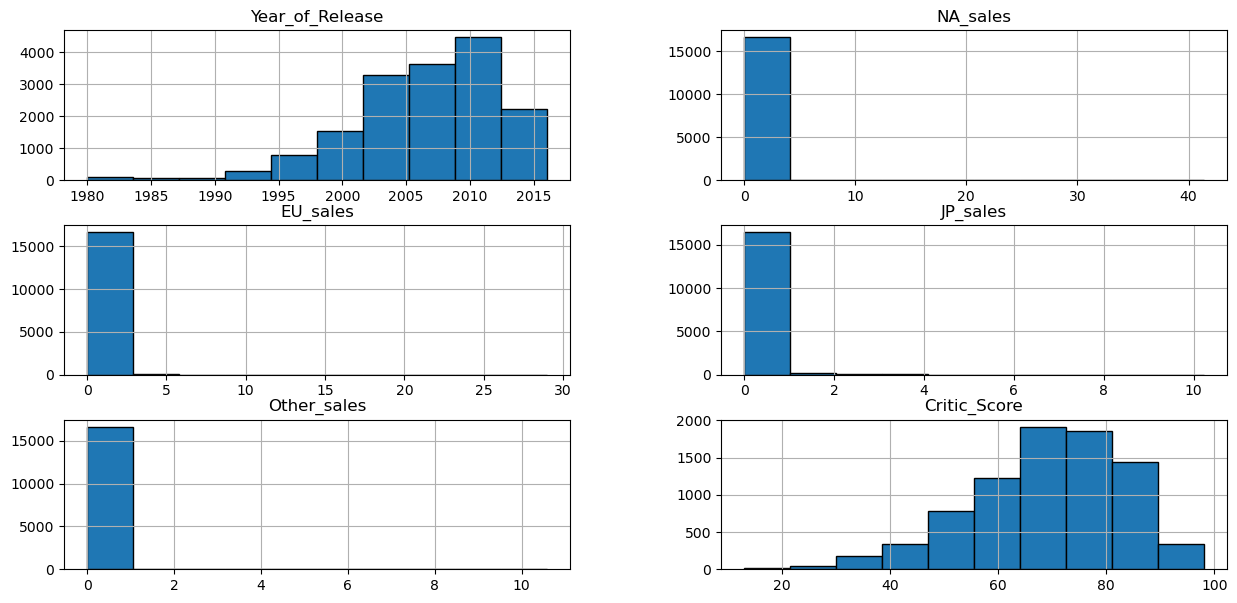

In [8]:
# Построим гистограммы для наглядного представления о числовых значениях
data.hist(figsize=(15, 7), bins=10, edgecolor="black", grid = True) 
plt.show()

**Вывод:**

Входе исследования данных вияснилось:
* датасет состоит из 16715 строк
* в данных имеются пропуски
* наименования колонок необходимо привести к единому стилю snake_case
* колонку Year_of_Release необходимо привести к формату integer.
* в колонках Critic_Score, User_Score, Rating имеются пропущенные значения.


## Предобработка данных

Приведем названия столбцов датафрейма к нижнему регистру:

In [9]:
# Приведение к нижнему регистру
data.columns = data.columns.str.lower()

#Проверка полученного резутатата 
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Проверим количество пропущенных значений в датасете и определем причину их возникновения:

In [10]:
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В колонках *name, year_of_release, genre, critic_score, user_score, rating* имеются пропущенные значения.

**Проверим колонку name:**

In [11]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропусков в колонке name всего две штуки. В связи с чем их можно спокойно удалить. На дальнейшем исследовании это никак не скажется.

**Проверим колонку year_of_release:**

In [12]:
data.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


С пропущенными значениями в колонке 'year_of_release' не получится ничего сделать(усреднить, заменить медианой и т.д.) В связи с чем удалим эти строки. 

**Проверим колонку genre:**

In [13]:
data.query('genre != genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенные значиния в 'genre' соответствуют пропущенным значениям в колонке 'name', мы решили от них избавиться. Могу предположить, что природа пропусков связана с человеческим фактором. 


**Проверим общие пропущенные значения в колонках critic_score, user_score, rating:**

In [14]:
data.query('critic_score ! = critic_score & user_score != user_score & rating != rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В колонках : *critic_score, user_score, rating*. Это оценки пользователей, критиков и общий рейтинг игры. В столбцах имеется большое количество пропущенных значений. Больше всего пропущенных значений в колонке *critic_score* (оценка критиков) связано это с тем, что критики реже выставляют оценку играм, чем обычные пользователи.

### Удаление пропусков

Пропущенные значения в колонках **name** и **year_of_release** удалим в связи с малым объемом NAN

In [15]:
# Удаление пропусков
data = data.dropna(subset=['name', 'year_of_release'])

# Проверка удаления
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропущенные значения в колонках : **critic_score, user_score, rating** лучше оставить без изменения. т.к. заменить их средним или медианой не представляется возможным.

Изучим колонку **user_rating** в ней присутствуют значения tbd (TBD - To Be Datermined -  Предстоит определить).
По сути это пропуски в колонке **user_score**, т.к. значение неопределено.

In [16]:
data.loc[data.loc[:, 'user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


в таблице присутствкет 2376 строк где в колонке user_score есть tbd

In [17]:
# заменим TBD на NAN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# посчитаем кол-во пропущенных значений в колонке: 
data['user_score'].isna().sum()

8981

В связи с заменой tbd на NAN количество пропусков увеличилось в конке user_score. 

### Суммарные продажи во всех регионах

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

### Преобразование данных

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Поменям тип данны в колонках: year_of_release, user_score на int и float

In [21]:
# замена типа данных:
data['year_of_release'] = data['year_of_release'].astype('int')

data['user_score'] = data['user_score'].astype('float')
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

### Проверка дубликатов

**Явные дубликаты:**

In [22]:
# Проверка на явные дубликаты 
data.duplicated().sum() 

0

In [23]:
for column in data:
    print(column, ':', data.duplicated(subset=column).sum())

name : 5018
platform : 16413
year_of_release : 16407
genre : 16432
na_sales : 16043
eu_sales : 16137
jp_sales : 16200
other_sales : 16289
critic_score : 16362
user_score : 16348
rating : 16435
total_sales : 15440


**Явных дубликатов не обнаружено**, а одинаковые значения в данном датасете присутствуют - это нормально. т.к. рейтинги, платформы и т.д. могут совпадать - это норма.
Смущает только колонка *name*, но и здесь можно объяснить дубликаты тем, что одна и та же игра выходит на разных платформах.

**Неявные дубликаты:**

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [25]:
# Колонки где могут встретиться неявные дубликаты:
columns = ['name', 'platform', 'year_of_release', 'genre', 'rating']

# Изучим уникальные значения для выявления неявных дубликатов
for column in columns:
    print(column)
    display(data[column].sort_values().unique())

name


array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio', 'uDraw Studio: Instant Artist',
       '¡Shin Chan Flipa en colores!'], dtype=object)

platform


array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

year_of_release


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

genre


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

rating


array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Неявных дубликатов нет**. 

### Вывод:

На этапе предобработки мы проверили датасет на предмет наличия пропущенных значений, дубликатов явных и неявных. Привели тип данных к соответствию, посчитали суммарные продажи по регионам и создали столбец total_sales на основании данных.

In [26]:
# поиск неявных дубликатов:
data[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


Обнаружен один дубликат по колонкам 'name', 'platform', 'year_of_release'. 

Удалим данный дубликат:

In [27]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

Проверим результат удаления:

In [28]:
data[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


т.к. я заметил в названиях присутствуют пробелы с разных сторон слова, удалим с помощью метода .strip():

In [29]:
# Функция удаления пробелов с двух сторон названия.
def strip(x):
    x = x.strip()
    return x

data['name'] = data['name'].apply(strip)
data['platform'] = data['platform'].apply(strip)

Перепроверим всё ещё раз :

In [30]:
data.duplicated().sum()

0

Других дубликатов нет 

## Исследовательский анализ данных

В данном разделе мы:
* Посмотрим, сколько игр выпускалось в разные годы.    
* Посмотрим, как менялись продажи по платформам. 
* Построим прогноз на 2017 год, на основе данных за актуальный период.
* Определим какие платформы лидируют по продажам
* Узнаем какой жанр самый прибыльный для производства игр


In [31]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [32]:
# Вывод количества игр по годам
data['year_of_release'].value_counts().reset_index().sort_values('index', ascending = False)

,index,year_of_release
14,2016,502
11,2015,606
12,2014,581
13,2013,544
10,2012,652
4,2011,1136
2,2010,1255
1,2009,1426
0,2008,1427
3,2007,1197


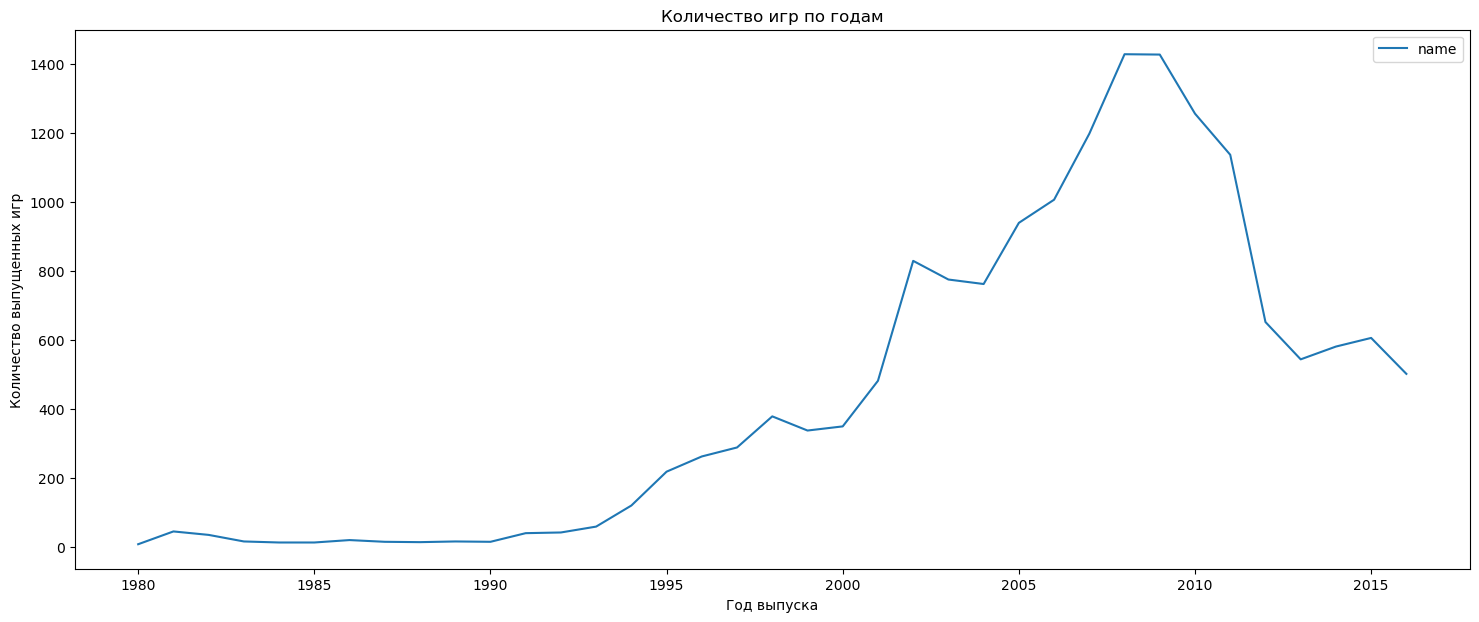

In [33]:
gemes_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(18, 7))
sns.lineplot(data=gemes_year)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

Из графика видно, что до 1994 года выпускалось малое число игр, а начиная с 1995 года темпы создания игры увеличились.
Пик производства игр пришелся на 2009 год, было произведено игр в количестве - 1426 ед., после количество выпускаемых игр начало снижаться. Возможно это связано с конкуренцией между игровыми платформами, количество платформ под которые делались игры в 2009 резко сократилось(не выдержали конкуренции) соответственно и сократилось количество выпускаемых игр. В 2006 году вышла PS3, став лидером. В 2013 году вышла PS4. 

### Суммарные продажи по платформам

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [35]:
total_sells = (data.pivot_table(index = 'platform',
                                values = 'total_sales',
                                aggfunc = 'sum')
    .sort_values(by='total_sales',ascending=False))

total_sells

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


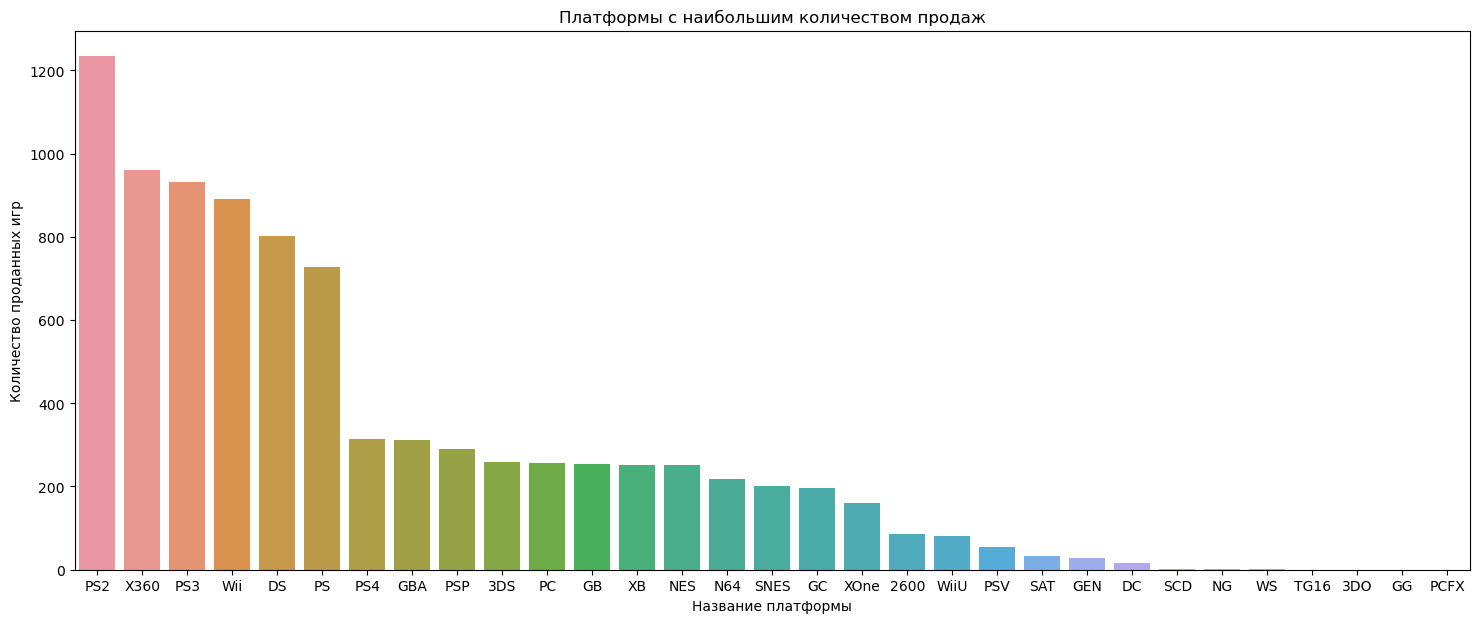

In [36]:
plt.figure(figsize=(18, 7))
sns.barplot(x=total_sells.index, y=total_sells['total_sales'])
plt.title('Платформы с наибольшим количеством продаж')
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных игр')
plt.show()

In [37]:
top_platform = (data.pivot_table(index='platform', 
                                 values='total_sales', 
                                 aggfunc='sum')
                    .sort_values(by='total_sales',
                                 ascending=False).reset_index()
                    .loc[0:5])
top_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [38]:
# Фукнция сбора данных для линейных графиков
try:
    def total_sales_by_year(platform):
        top_platform = data.loc[(data['platform'] == platform)]
        platform_sales_by_year = (top_platform.pivot_table(index='year_of_release',
                                                            values='total_sales',
                                                            aggfunc='sum')
                                                .sort_values('year_of_release', ascending=False))
        return platform_sales_by_year
except:
    print('Ошибка')

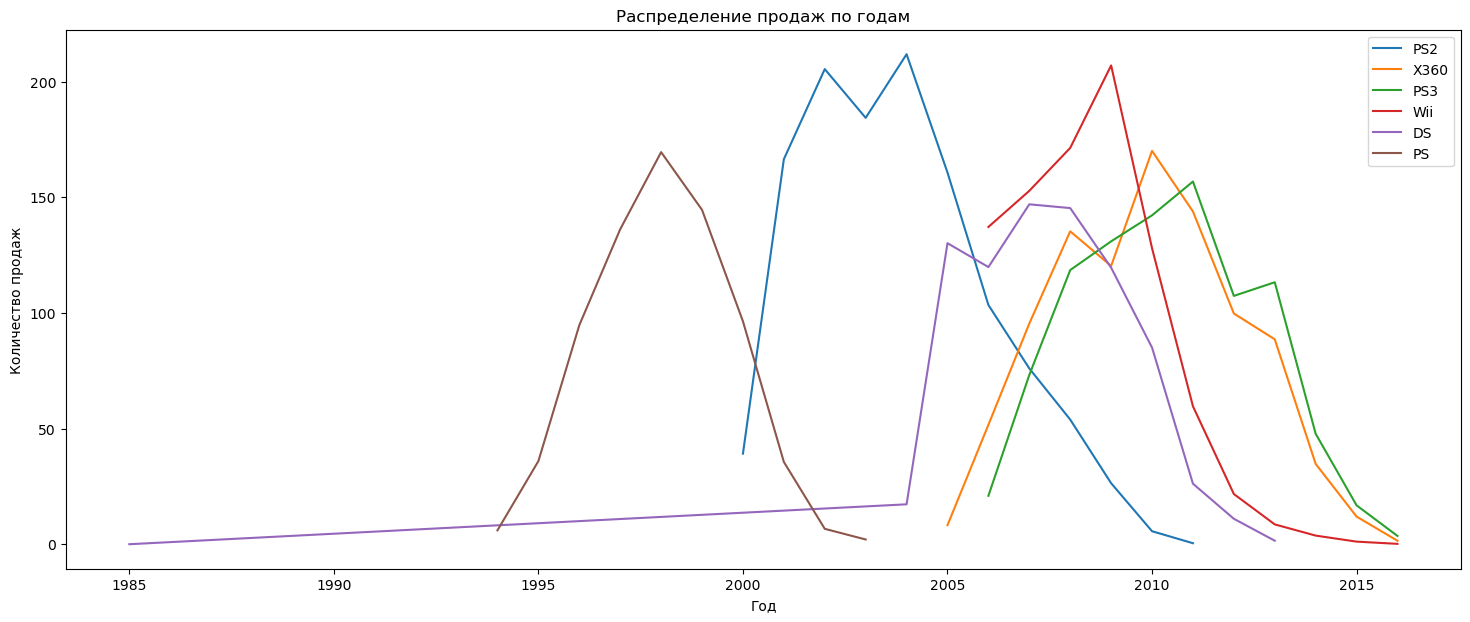

In [39]:
plt.figure(figsize=(18, 7))
plt.title('Распределение продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
for platform in top_platform['platform']:
    sns.lineplot(data=total_sales_by_year(platform)['total_sales'], label=platform)
    plt.legend()    

Из графика видно, что лидером является платформа PS2. Также можно увидеть что объем продаж у платформы XBOX360 и PS3 примерно одинаковый. Судя по графику платформы живут около 7-10 лет, после чего их сменяет более новое поколение.  У платформы DS имеется аномальное значение, попробуем определить что это:

In [40]:
data.loc[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Очевидно, это ошибка в данных, т.к. не может быть, что игра была выпущена раньше самой платформы на 19 лет.

Учитывая, что продолжительность жизни платформы составляет 7-10 лет, чтобы спрогнозировать "Выживаемость" и построить прогноз на 2017 год. Необходимо взять данные как минимум с 2011 года, а лучше взять с запасом - 2014 год, т.к. данная индустрия стремтительно развивается и срок более 4-5 лет может быть не совсем актуальным. Так будет понятно какие платформы показывают рост, а какие "умирают".

In [41]:
data_2014 = data.loc[data['year_of_release'] >= 2014]
data_2014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [42]:
# Вывод описательной статистики
data_2014.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


В получившемся датасете 1689 строк - это таблица игр вышедших начиная с 2014 года. В дальнейшем данные за предыдущие годы учтены не будут.

### Определим несколько потенциально прибыльных платформ.

In [43]:
top_platform_2014 = (data_2014.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                    .sort_values(by='total_sales', ascending=False)
                    .reset_index())
top_platform_2014

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [44]:
def total_sales_2014(platform):
    platform_sales = data_2014.loc[(data_2014['platform'] == platform)]
    platform_sales_year = (platform_sales.pivot_table(index='year_of_release',
                                                      values='total_sales',
                                                      aggfunc='sum')
                              .sort_values('year_of_release', ascending=False)
                              .reset_index())
    return platform_sales_year


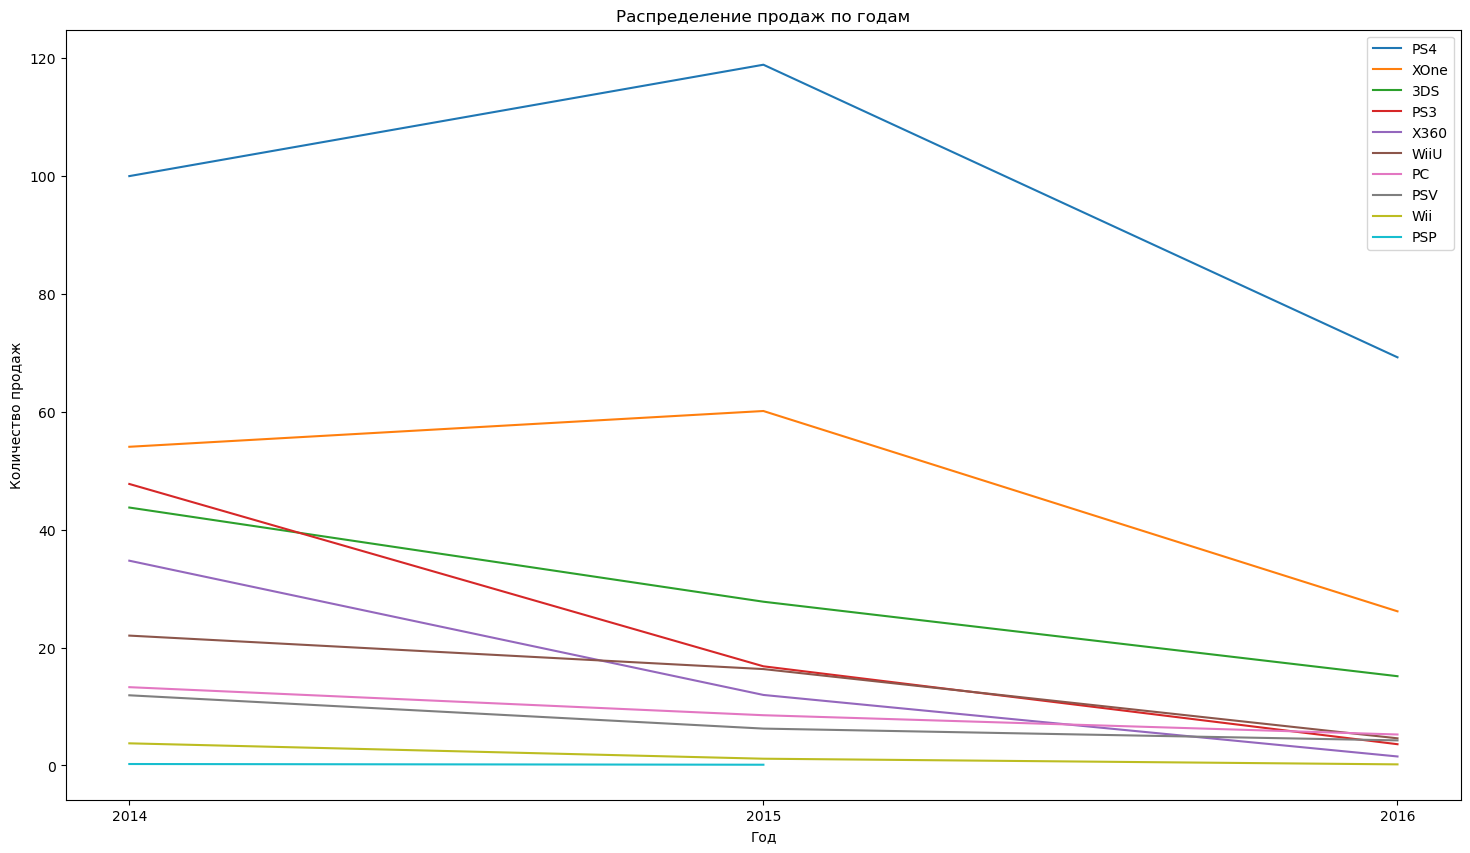

In [45]:
plt.figure(figsize=(18, 10))
plt.title('Распределение продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

for platform in top_platform_2014['platform']:
    sns.lineplot(data=total_sales_2014(platform), x='year_of_release', y = 'total_sales', label=platform)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.legend()

Из графика видно, что в настоящее время лидируют PS4 и ХOne. Эти платформы можно взять за основу для дальнейших наблюдений за продажами. Однако падающий тренд спроса к 2016 году виден для всех платформ. Платформа PSP к 2015 году исчезла с продаж.

### График глобальных продаж игр в разбивке по платформам

Построим диаграммы размаха(ящик с усами) для определения определения медианы, Q1,Q3.

In [46]:
platform_sales_list = list(top_platform_2014['platform'].loc[:4])

top_5_platform_data = data_2014.loc[(data_2014['platform']
                              .isin(platform_sales_list))]
top_5_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [47]:
# Вывод описательной статистики.
top_5_platform_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,505.000000,643.000000,1146.000000
mean,2014.965969,0.220654,0.203700,0.061850,0.064921,71.508911,6.534215,0.551126
std,0.800476,0.511491,0.547368,0.244133,0.167507,12.785952,1.575270,1.215718
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,65.000000,5.700000,0.050000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,73.000000,6.900000,0.140000
75%,2016.000000,0.190000,0.160000,0.050000,0.050000,80.000000,7.700000,0.480000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.200000,14.630000


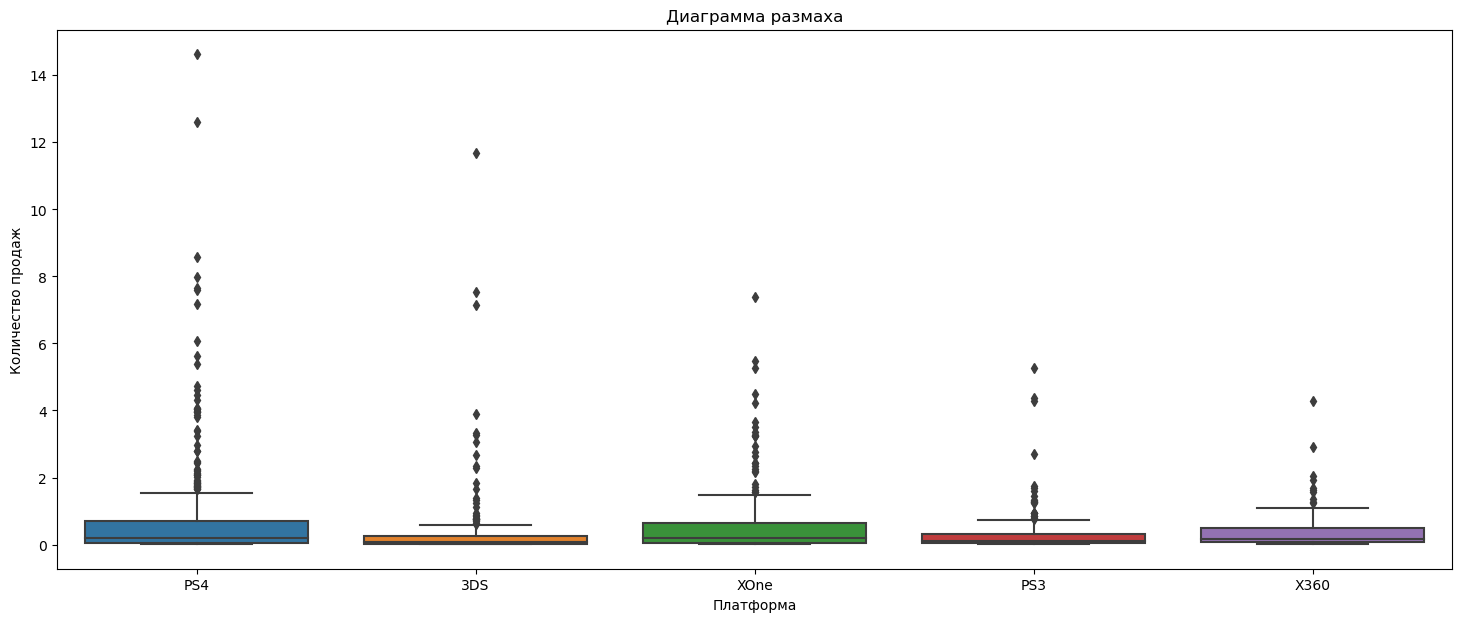

In [48]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=top_5_platform_data, x='platform', y='total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Из-за больших выбросов диаграмма получается сплющенной и значения невозможно разобрать, построим дополнительно укрупненную версию.

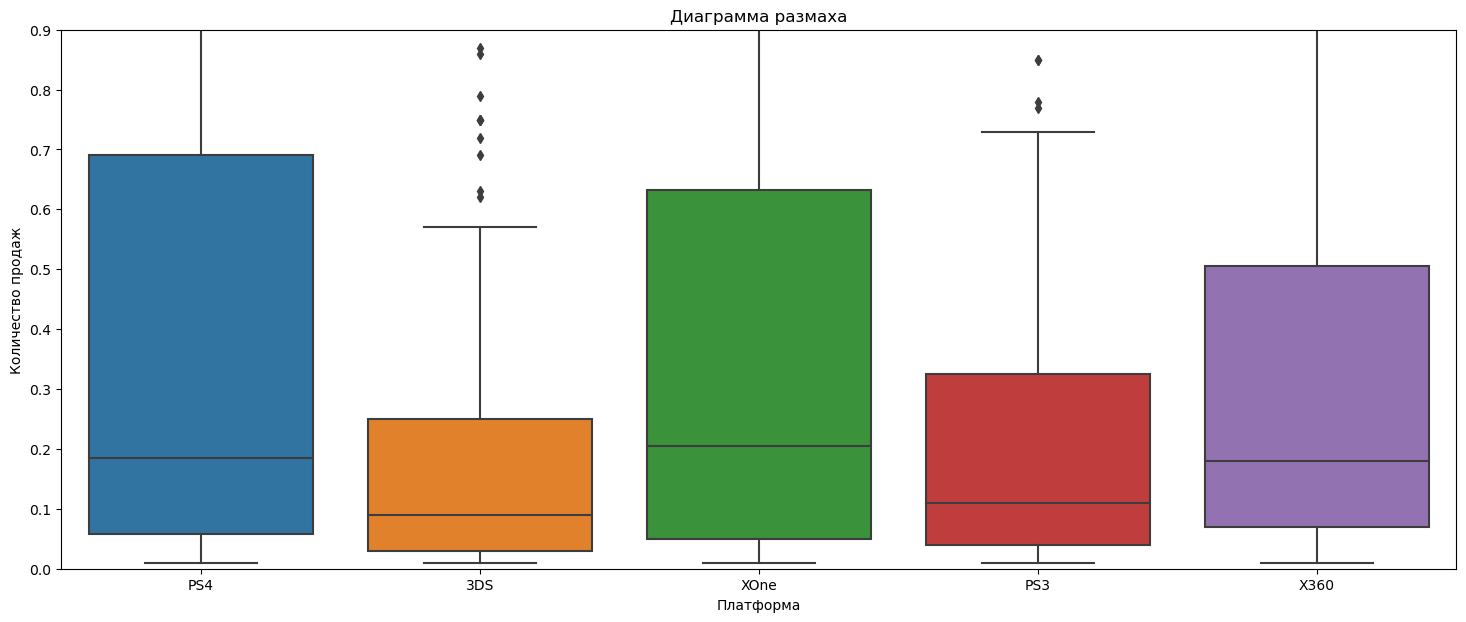

In [49]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=top_5_platform_data, x='platform', y='total_sales')

plt.ylim(0, 0.9)

plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Из диаграммы размаха можно заметить, что медианные продажи по всем платформам составляют примерно 0.5 миллиона копий.
лидирущей платформой является PS4 игры, вышедшие на ней чаще попадают в топы продаж. Можно увидеть что иногда игры становятся такими популярными, что продажи достигают 15 миллионов копий.


### Изучим как вляют на продажи отзывы пользователей и критиков

На примере самой популярной платформы PS4, построим зависимость продаж от отзывов пользователей и критиков.

In [50]:
top_one_platform = data_2014.loc[(data_2014['platform'] == 'PS4')]
top_one_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [51]:
# Вывод описательной статистики
top_one_platform.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,376.000000,376.000000,376.000000,376.000000,376.000000,237.000000,242.000000,376.000000
mean,2015.236702,0.262261,0.345851,0.039947,0.118298,72.164557,6.828099,0.766356
std,0.762336,0.583439,0.815480,0.067048,0.256506,12.214985,1.399035,1.614969
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.200000,0.057500
50%,2015.000000,0.050000,0.070000,0.015000,0.020000,73.000000,7.100000,0.185000
75%,2016.000000,0.240000,0.280000,0.050000,0.102500,80.000000,7.875000,0.690000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


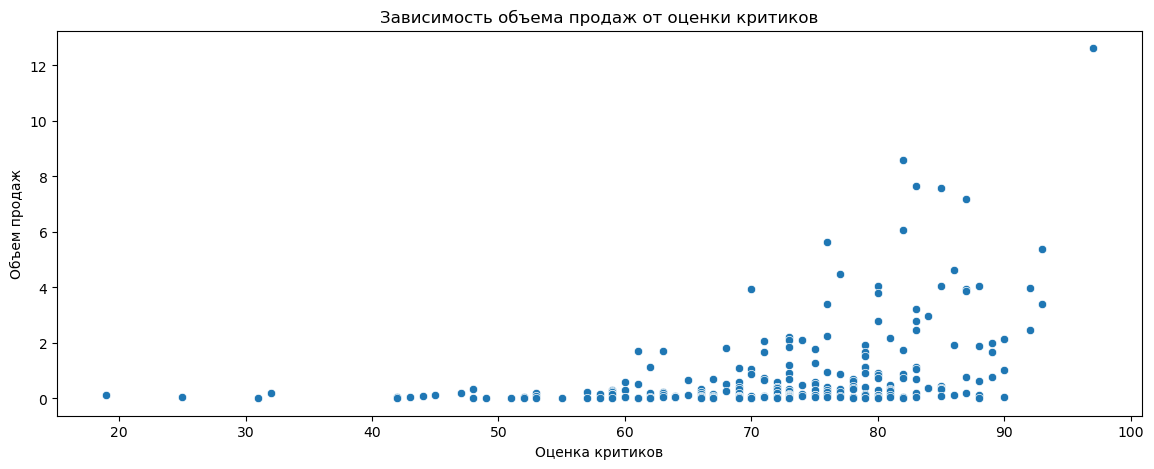

0.40266141068104083

In [52]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=top_one_platform, x='critic_score', y='total_sales')
plt.title('Зависимость объема продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')
plt.show()
top_one_platform['critic_score'].corr(top_one_platform['total_sales'])

Кореляция пирсона ниже среднего уровня. Чаще всего критики выставляюсвои оценки от 60-90 баллов.

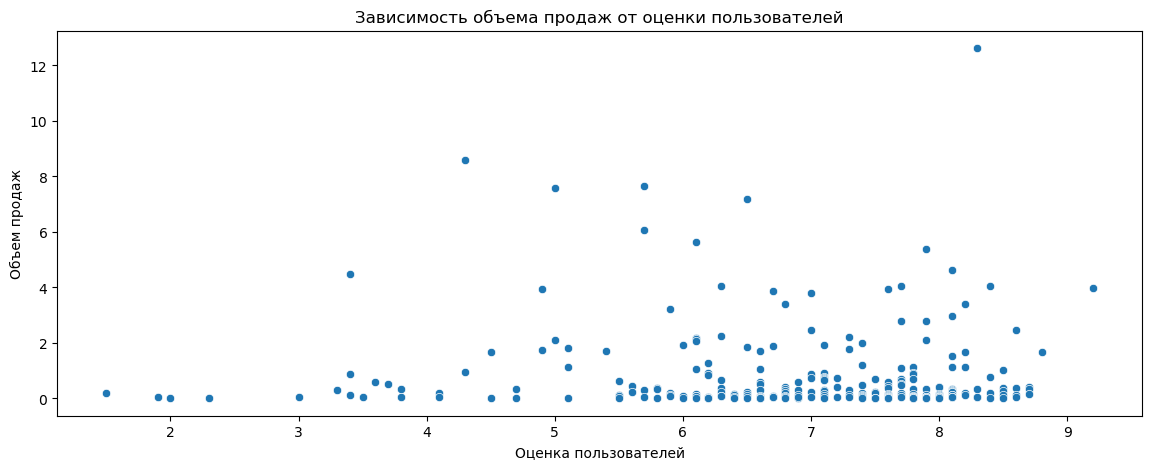

-0.040131589472697286

In [53]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=top_one_platform, x='user_score', y='total_sales')
plt.title('Зависимость объема продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж')
plt.show()
top_one_platform['user_score'].corr(top_one_platform['total_sales'])

Уровень кореляции отрицательный, т.е. объем продаж никак не связан с оценками пользователей. 

### Соотнесем выводы с продажами игр на других платформах


Создадим функцию определяющую кореляционную связь на основе выбранных данных и выведем соответствующие графики рассеивания.

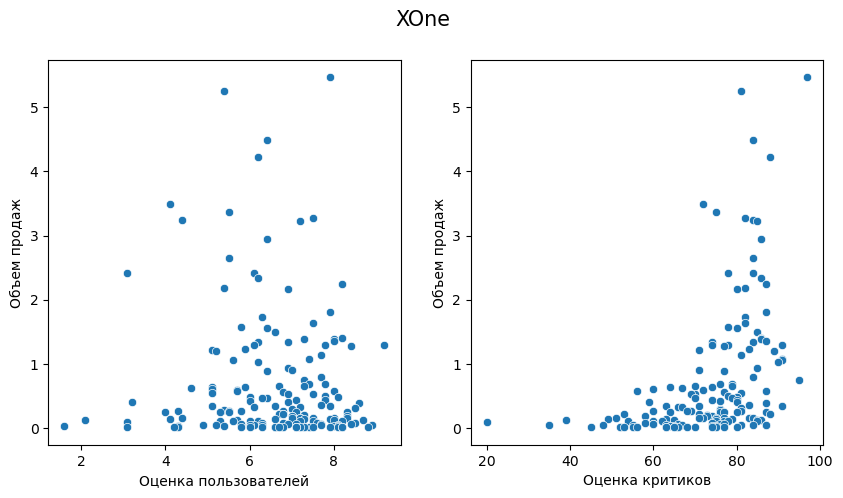

Зависимость между отзывами пользователей и продажами  XONE : Отсутствует -0.07038392806475818
Зависимость между отзывами критиков и продажами  XONE : Ниже средней 0.428676943703332


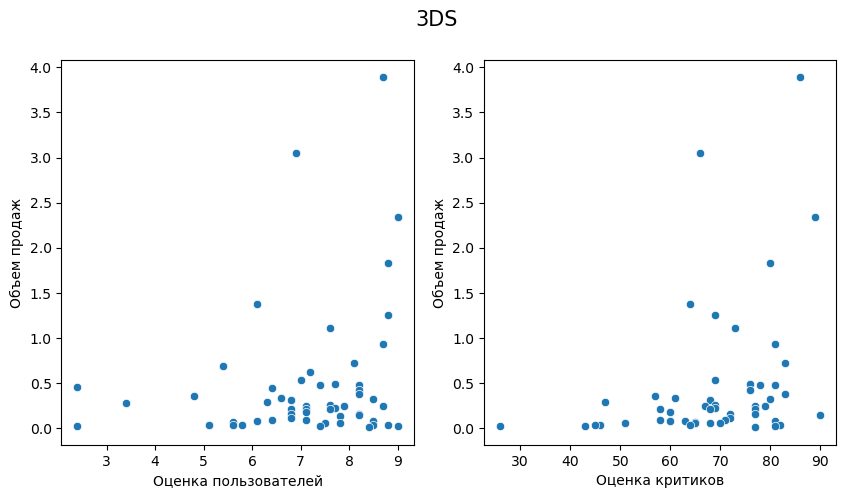

Зависимость между отзывами пользователей и продажами  3DS : Слабая 0.2151932718527028
Зависимость между отзывами критиков и продажами  3DS : Ниже средней 0.3141174928690509


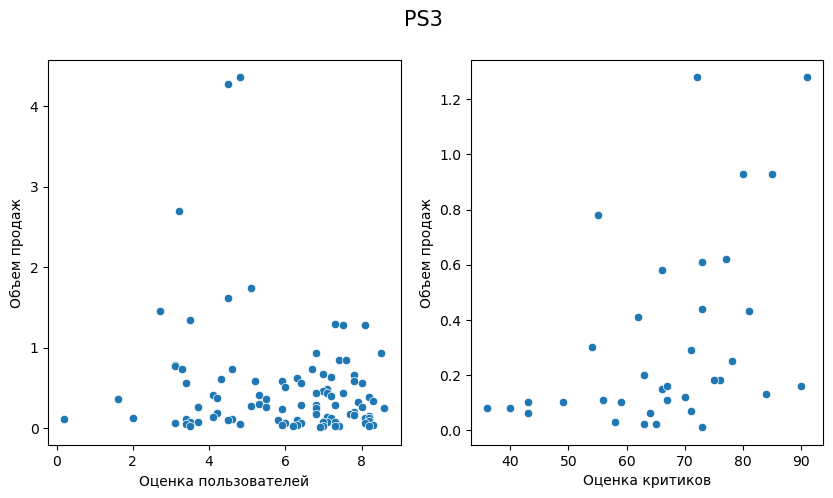

Зависимость между отзывами пользователей и продажами  PS3 : Отсутствует -0.16676141347662107
Зависимость между отзывами критиков и продажами  PS3 : Ниже средней 0.44657460493190715


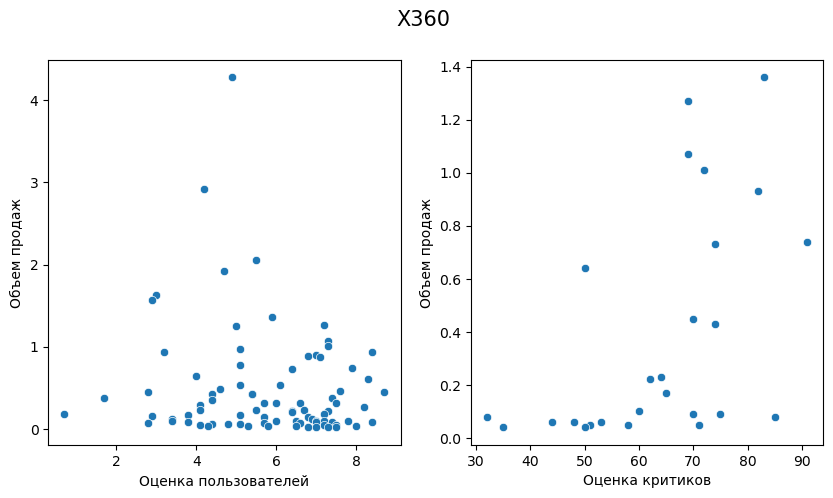

Зависимость между отзывами пользователей и продажами  X360 : Отсутствует -0.1384445709456651
Зависимость между отзывами критиков и продажами  X360 : Средняя 0.5257228356581521


In [54]:
platform_sales_list = list(top_platform_2014['platform'].loc[1:4])
top_5_platform_all_sales = data_2014.loc[(data_2014['platform']
                                        .isin(platform_sales_list))]
top_5_platform_data

try:
    def sales_from_reviews(platform):
        platform_df = top_5_platform_all_sales.loc[top_5_platform_all_sales['platform'] == platform]
        fig, ax = plt.subplots(1 ,2, figsize=(10,5))
        sns.scatterplot(data=platform_df, x='user_score', y='total_sales', ax=ax[0])
        sns.scatterplot(data=platform_df, x='critic_score', y='total_sales', ax=ax[1])
        fig.suptitle(platform, fontsize=15)
        ax[0].set(xlabel='Оценка пользователей')
        ax[1].set(xlabel='Оценка критиков')
        ax[0].set(ylabel='Объем продаж')
        ax[1].set(ylabel='Объем продаж')
        plt.show()

        user_corr = platform_df['user_score'].corr(platform_df['total_sales'])
        critic_corr = platform_df['critic_score'].corr(platform_df['total_sales'])

        if 0.3 >= user_corr >= 0.1:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Слабая', user_corr)
        elif 0.5 >= user_corr >= 0.3:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Ниже средней', user_corr)
        elif 0.7 >= user_corr >= 0.5:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Средняя', user_corr)
        elif 0.9 >= user_corr >= 0.7:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Высокая', user_corr)
        elif 1 >= user_corr >= 0.9:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Сильная', user_corr)
        else:
            print('Зависимость между отзывами пользователей и продажами ', platform.upper(), ': Отсутствует', user_corr)

        if 0.3 >= critic_corr >= 0.1:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Слабая', critic_corr)
        elif 0.5 >= critic_corr >= 0.3:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Ниже средней', critic_corr)
        elif 0.7 >= critic_corr >= 0.5:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Средняя', critic_corr)
        elif 0.9 >= critic_corr >= 0.7:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Высокая', critic_corr)
        elif 1 >= critic_corr >= 0.9:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Сильная', critic_corr)
        else:
            print('Зависимость между отзывами критиков и продажами ', platform.upper(), ': Отсутствует', critic_corr)
    for platform in platform_sales_list:
        sales_from_reviews(platform)
except:
    print('Ошибка')

Из данных видно, что у других платформ зависимость между отзывами пользователей и критиков к продажам примерно такая же, как и у PS4. 

### Распределение игр по жанрам

In [55]:
genre_data = (data_2014.pivot_table(index='genre', values='total_sales', aggfunc='median')
                         .sort_values(by='total_sales', ascending=False)
                         .reset_index())
genre_data

,genre,total_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


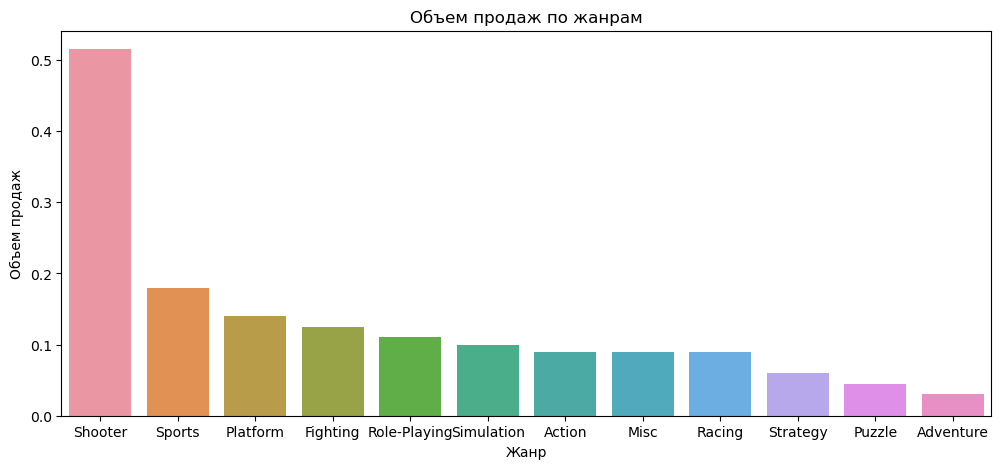

In [56]:
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_data['genre'], y=genre_data['total_sales'])
plt.title('Объем продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.show()

По объему продаж лидируют жанр Шутер.

### Вывод:

Из проведенного анализа можно заметить, что:

* До 1994 года выпускалось малое количество игр, а начиная с 1995 года темпы создания игры увеличились.
* Продолжительность "жизни" платформы около 7-10 лет, после чего их сменяет более новое поколение.
* В последние годы лидируют PS4, XOne, 3DS, PS3, X360 по объему продаж
* Корреляция по PS4 между отзывами критиков и объемами продаж средняя, а между отзывами пользователей и объемами продаж отсутствует
* По остальным платформам корреляция схожая с PS4.
* Наиболее продаваемый жанр - Shooter



## Анализ пользователей каждого региона

Составим портрет пользователей в зависимости от региона:
 * NA_sales — продажи в Северной Америке (миллионы проданных копий).
 * EU_sales — продажи в Европе (миллионы проданных копий).
 * JP_sales — продажи в Японии (миллионы проданных копий).

### Портрет пользователей из Северной Америки

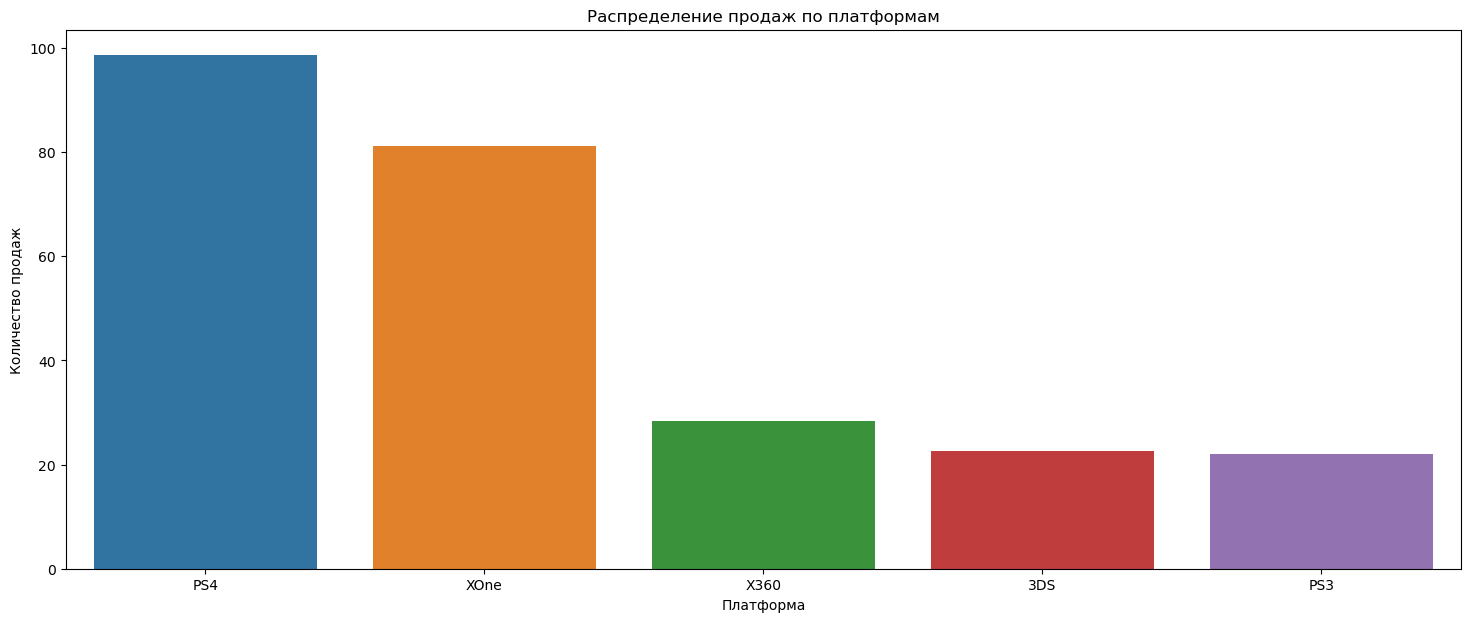

In [57]:
na_sales = (data_2014.pivot_table(index='platform',
                                values='na_sales',
                                aggfunc=np.sum)
                    .sort_values(by='na_sales',
                          ascending=False)
                    .reset_index()
                    .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=na_sales, x='platform', y='na_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Самыми популярными платформами в Северной америке явзяются PS4 и XOne

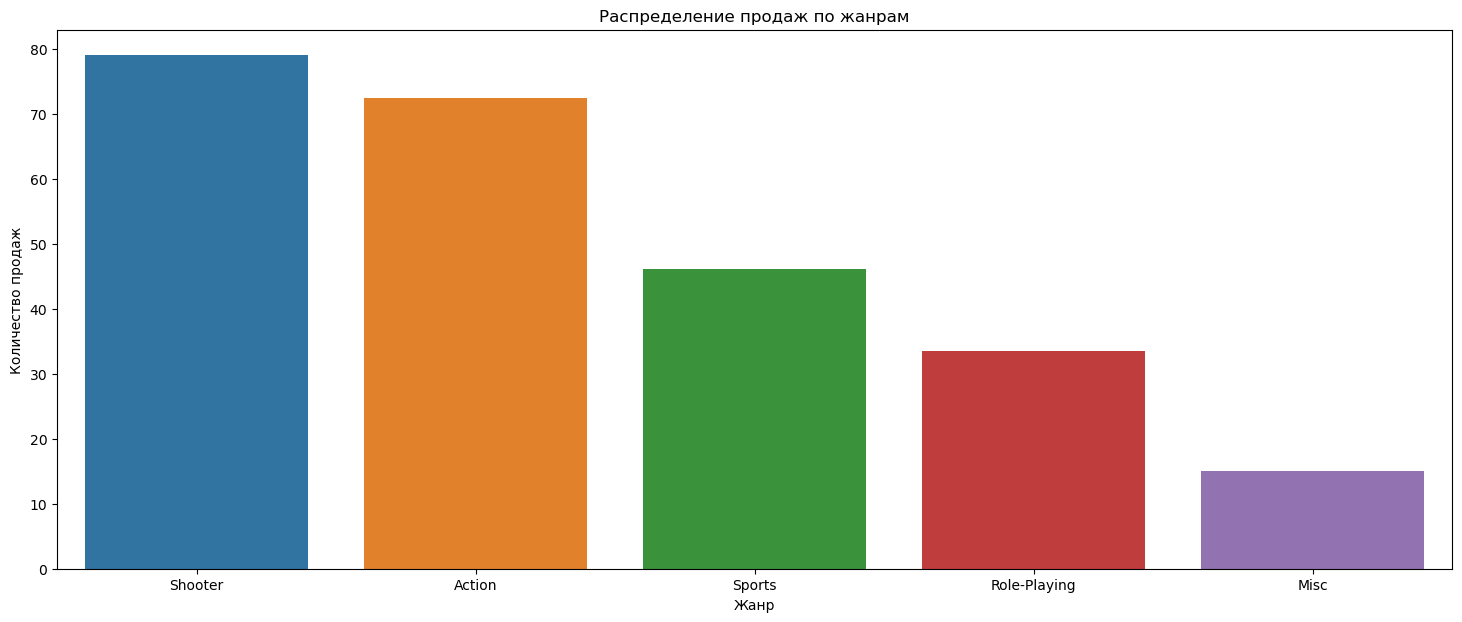

In [58]:
na_genre = (data_2014.pivot_table(index='genre', values='na_sales', aggfunc=np.sum)
                   .sort_values(by='na_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=na_genre, x='genre', y='na_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

В Северной Америке пользователи больше предпочитают жанры Шутер и Экшн. Меньше всего из выборки популярен жанр музыки. 

Посмотрим влияет ли рейтинг ESRB на продажи в США

Text(0, 0.5, 'Количество продаж')

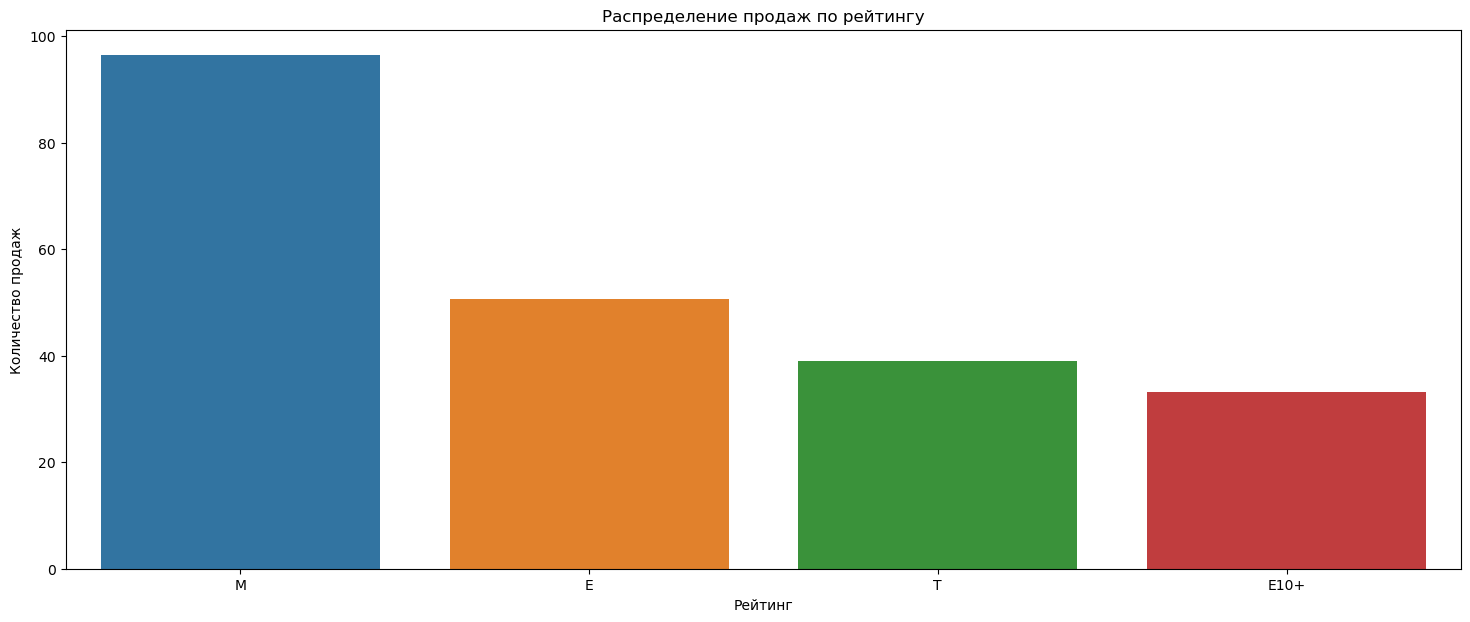

In [59]:
na_rating = (data_2014.pivot_table(index='rating',
                                         values='na_sales',
                                         aggfunc=np.sum).sort_values(by='na_sales', ascending=False)
                            .reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=na_rating, x='rating', y='na_sales')
plt.title('Распределение продаж по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

Из данных видно, что рейтинг - М имеет наибольшие продажи.

### Портрет пользователей из Европы

Рассмотрим какие платформы популярны в Европе

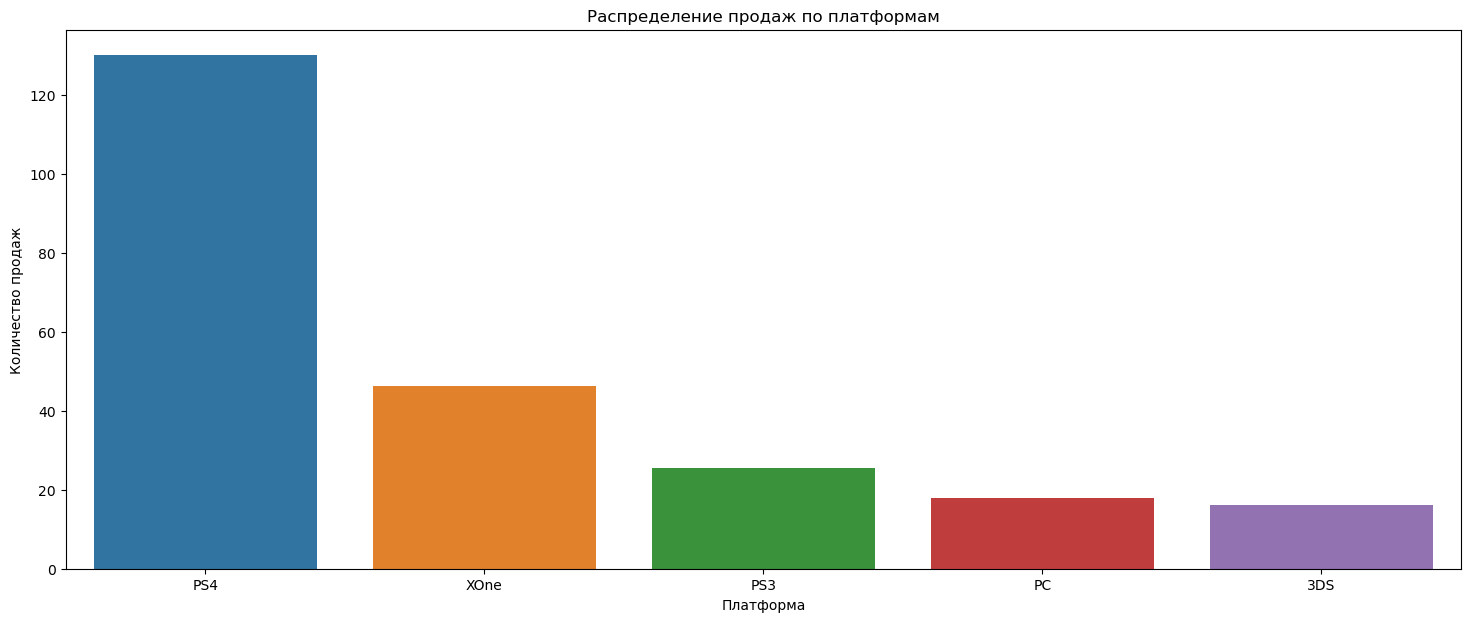

In [60]:
eu_sales = (data_2014.pivot_table(index='platform', values='eu_sales', aggfunc=np.sum)
                   .sort_values(by='eu_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_sales, x='platform', y='eu_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Из данных видно, что в европе значительное преимущество имеет платформа PS4.

Построим распределение по жанрам в Европе

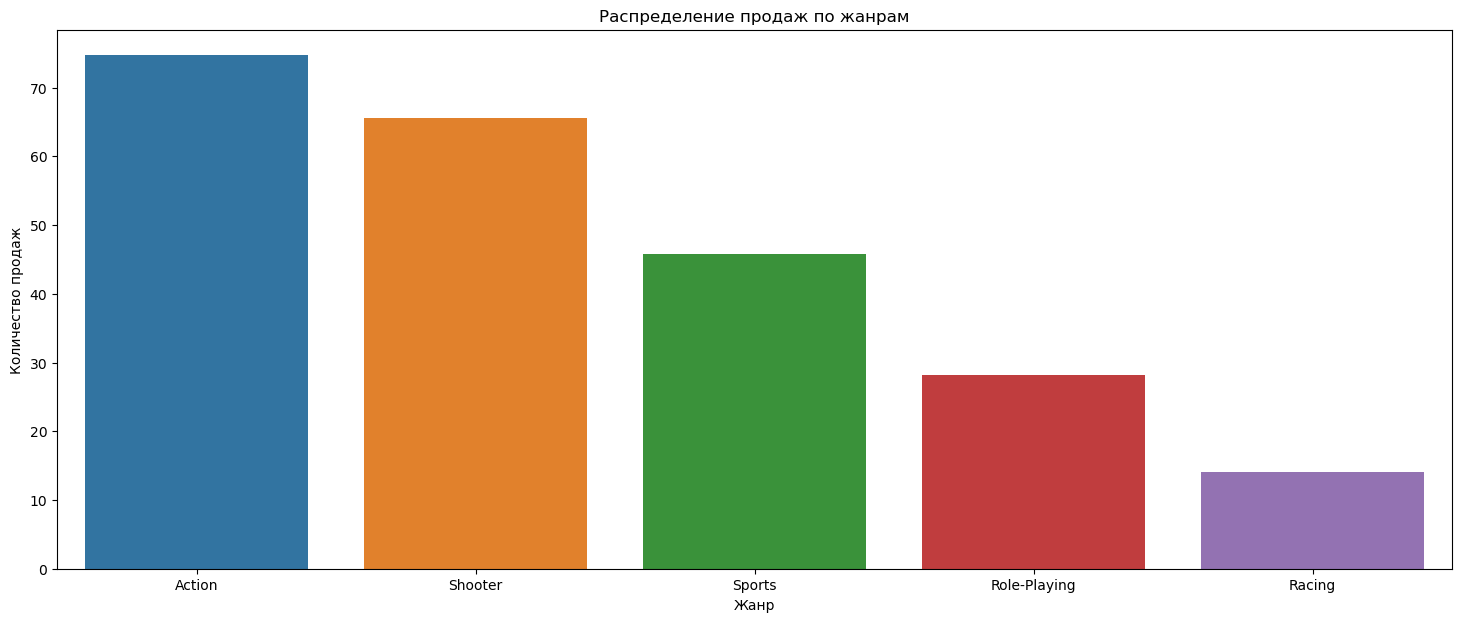

In [61]:
eu_genre = (data_2014.pivot_table(index='genre', values='eu_sales', aggfunc=np.sum)
                   .sort_values(by='eu_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_genre, x='genre', y='eu_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Самыми популярными жанрами в Европе являются Action и Shooter

Посмотрим влияет ли рейтинг ESRB на продажи в Европе

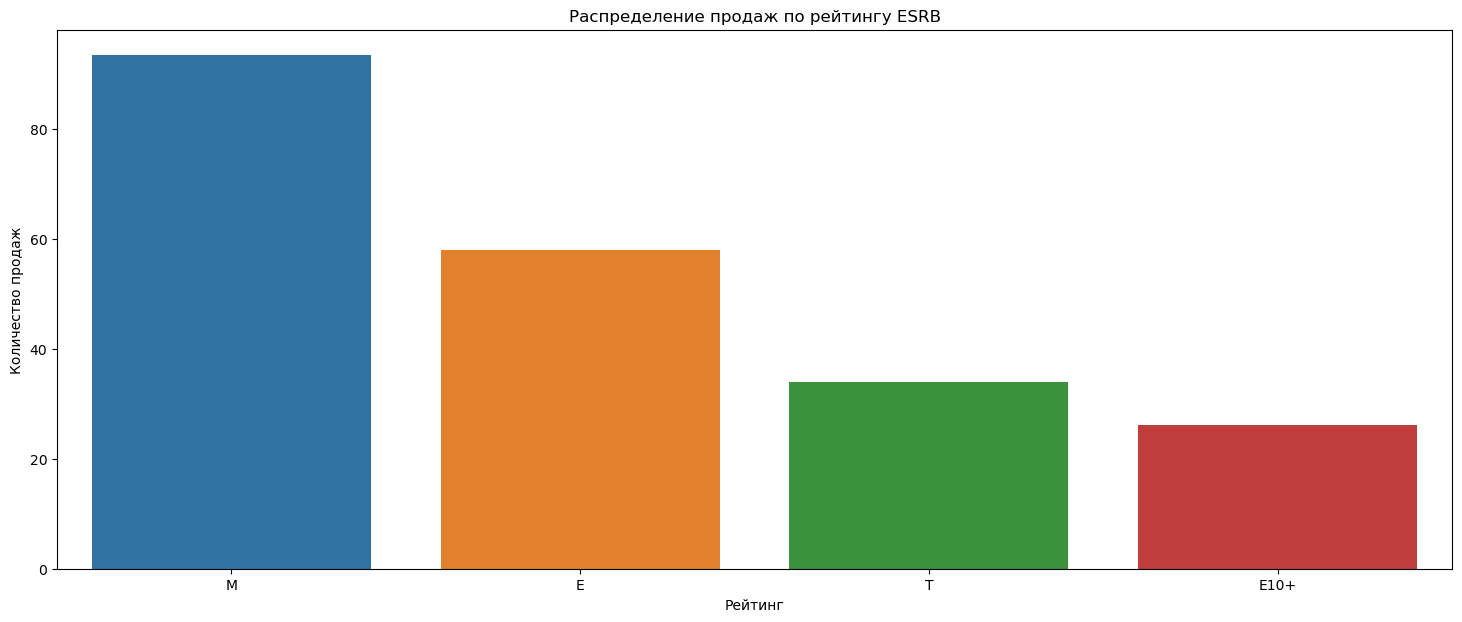

In [62]:
eu_rating = (data_2014.pivot_table(index='rating',
                                  values='eu_sales',
                                  aggfunc=np.sum).sort_values(by='eu_sales', ascending=False)
                            .reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_rating, x='rating', y='eu_sales')
plt.title('Распределение продаж по рейтингу ESRB')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

В Европе как и в США по рейтингу ESRB преобладает - рейтинг М.

### Портрет пользователей из Японии 

Рассмотрим, какие платформы самые популярные в Японии.

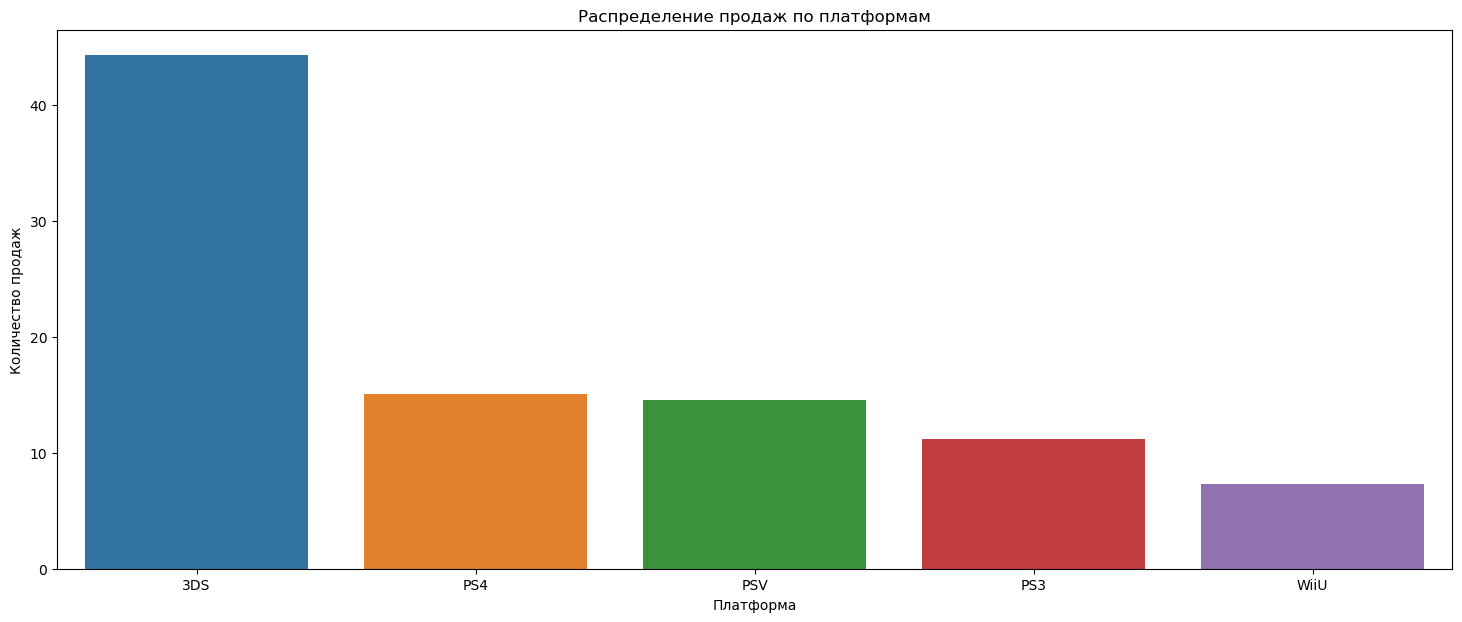

In [63]:
jp_sales = (data_2014.pivot_table(index='platform', values='jp_sales', aggfunc=np.sum)
                   .sort_values(by='jp_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_sales, x='platform', y='jp_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Из гистограммы видно, что в Японии по количеству продаж лидирует платформа 3DS.

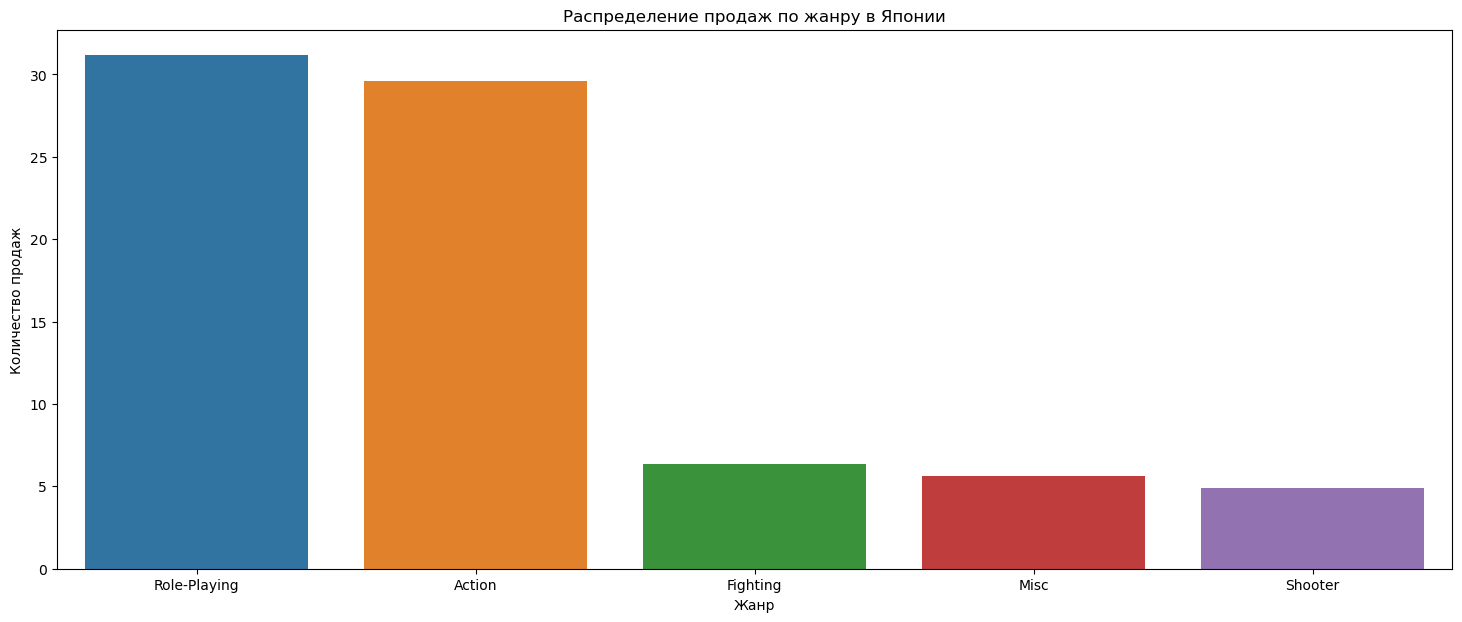

In [64]:
jp_genre = (data_2014.pivot_table(index='genre', values='jp_sales', aggfunc=np.sum)
                   .sort_values(by='jp_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_genre, x='genre', y='jp_sales')
plt.title('Распределение продаж по жанру в Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Из гистограммы  видно, что в Японии предпочитают жанр игры: Role-Playing и Action. 

Посмотрим влияет ли рейтинг ESRB на продажи в Японии

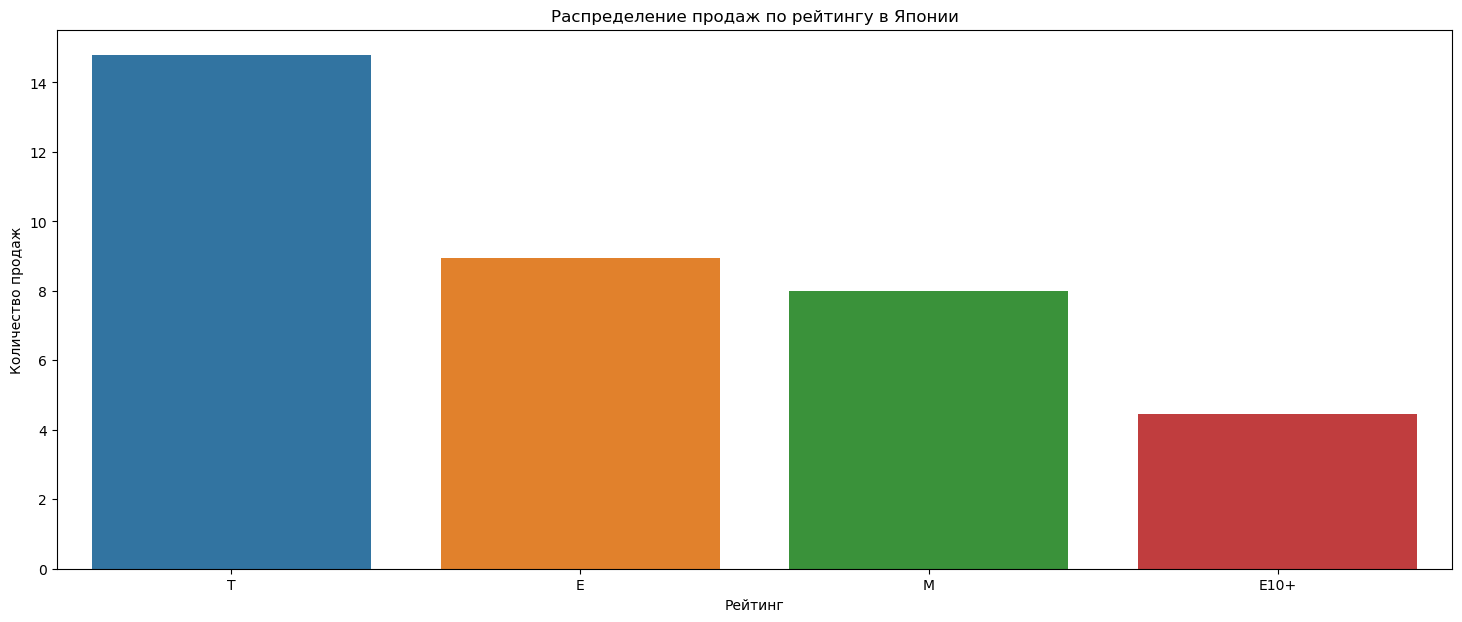

In [65]:
jp_rating = (data_2014.pivot_table(index='rating',
                                  values='jp_sales',
                                  aggfunc=np.sum).sort_values(by='jp_sales', ascending=False)
                            .reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_rating, x='rating', y='jp_sales')
plt.title('Распределение продаж по рейтингу в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

В Японии пользователи предпочитают играть в игры с рейтингом - Т. 

### Вывод:

Из проверенного анализа пользователей видно, что в разных частях света пользователи предпочитают играть в различные игровые жанры, а так же имеют различные предпочтения в игровых платформах.

* В США играют на PS4 и Xone, жанр shooter и actions, рейтинг ESRB - М.
* В Европе играют в PS4, жанры shooter и actions, рейтинг ESRB - М.
* В Японии играют в XDS, жанры  Role-Playing и actions, рейтинг ESRB - T.

## Проверка гипотез

Проверим гипотезу, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем гипотезы:
   * Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   * Н1 - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [66]:
# Проверка первой гипотезы
xone_rating = data_2014.loc[(data_2014['platform'] == 'XOne')]['user_score']
pc_rating = data_2014.loc[(data_2014['platform'] == 'PC')]['user_score']

alpha = 0.05

results = st.ttest_ind(xone_rating.dropna(), pc_rating.dropna(), equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу


Значение p-value говорит о том, что у мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверим гипотезу, **что средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем гипотезы:
   * Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые;
   * Н1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [67]:
action_genre = data_2014.loc[(data_2014['genre'] == 'Action')]['user_score']
sports_genre = data_2014.loc[(data_2014['genre'] == 'Sports')]['user_score']

alpha = 0.05

results = st.ttest_ind(action_genre.dropna(), sports_genre.dropna(), equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаемь нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 1.1825550382644557e-14% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы отвергаем.

### Вывод:

Мы проверили две гипотезы и обнаружили:

* мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.
* Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 1.1825550382644557e-14% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы отвергаем.


## Вывод

В данной исследовательской работе, мы изучили полученные на входе данные, это датасет содержащий информацию об играх, отзывах и игровых платформах, содержащий данные с 1980 года по 2016 год. На этапе предобработки, мы удалили пропущенные значения, рассчитали общую выручку и привели данные в соответствие, что позволило нам выявить определяющие успешность игры закономерности. Это позволило нам сделать следующие выводы для рекламной кампании на 2017 год:

* При продаже игр стоит ориентироваться на новые платформы, выпуск которых пришелся на последнее время. Они только начинают набирать обороты и их популярность будет расти. Старые платформы уже теряют свою актуальность, и уровень продаж на них снижается. Чтобы получить прибыль, стоит обращать внимание на новые платформы и предугадывать текущие тренды.

* В 2016 году продажи игровых платформ значительно сократились. Возможно, это было связано с появлением новой технологии, которая привлекла внимание пользователей (например, шлемы виртуальной реальности или мобильные телефоны). Поэтому важно проанализировать рынок и определить, какие технологии будут популярны в будущем, чтобы скорректировать стратегию развития компании.

* На данный момент и в ближайшем будущем рекомендуется ориентироваться на популярные игровые платформы, такие как PlayStation 4 и Xbox One.

* Необходимо учитывать, что в среднем игры продаются в количестве около 0.5 миллиона копий на топовых платформах. Иногда некоторые игры становятся исключением и получают большую популярность на определенной платформе, продажи достигают 15 миллионов, но это случается редко.

* Не стоит слишком сильно полагаться на отзывы пользователей и критиков при выборе платформы для игры. Их мнение не всегда отражает реальную популярность игры на определенной платформе.

* В части жанров, стоит ориентироваться на жанры шутеров, боевиков и ролевых игр. Эти жанры являются наиболее популярными в разных регионах.
    